In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
transactions = pd.read_csv('transaction_table.csv')
pd.set_option('display.float_format', lambda x: '%.0f' % x)

transactions.head()

In [3]:
product = pd.read_csv('product_table.csv')

In [4]:
transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])
transactions['weekday'] = transactions['tran_dt'].dt.dayofweek
transactions['weekend'] = transactions.weekday.apply(lambda x: 0 if x <= 5 else 1)

In [5]:
# may add store_id
transactions['tran'] = transactions['tran_dt'].astype('str').str.cat(transactions['cust_id'].astype('str'),sep="_")
transactions['tran'] = transactions['tran'].str.cat(transactions['store_id'].astype('str'),sep="_")

## Customers

## - revenues, transactions

In [9]:
# Total amount paid per customer
cust_pf = transactions.groupby(['cust_id']).tran_prod_paid_amt.sum().sort_values(ascending = False).to_frame().reset_index()

(array([  3.,   6.,  11.,  70., 240., 387., 463., 503., 495., 508., 479.,
        460., 444., 382., 375., 348., 319., 278., 263., 230., 222., 195.,
        212., 141., 158., 122., 131., 127.,  96.,  75.,  64.,  54.,  32.,
         17.,   7.,   3.]),
 array([ 3867.1       ,  4149.11694444,  4431.13388889,  4713.15083333,
         4995.16777778,  5277.18472222,  5559.20166667,  5841.21861111,
         6123.23555556,  6405.2525    ,  6687.26944444,  6969.28638889,
         7251.30333333,  7533.32027778,  7815.33722222,  8097.35416667,
         8379.37111111,  8661.38805556,  8943.405     ,  9225.42194444,
         9507.43888889,  9789.45583333, 10071.47277778, 10353.48972222,
        10635.50666667, 10917.52361111, 11199.54055556, 11481.5575    ,
        11763.57444444, 12045.59138889, 12327.60833333, 12609.62527778,
        12891.64222222, 13173.65916667, 13455.67611111, 13737.69305556,
        14019.71      ]),
 <a list of 36 Patch objects>)

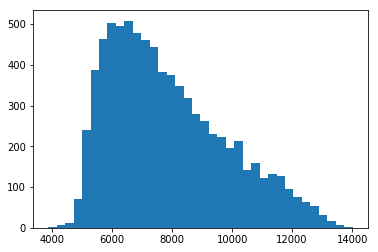

In [10]:
# histogram
plt.hist(cust_pf.tran_prod_paid_amt, bins='auto')

In [11]:
# Total amount paid
cust_pf.tran_prod_paid_amt.sum()

62211787.76999934

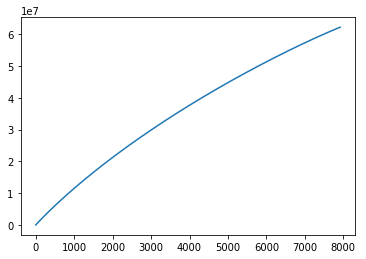

In [12]:
# accumulate plot
cust_pf.tran_prod_paid_amt.cumsum().plot()

In [13]:
# Number of customers
len(transactions.cust_id.unique())

7920

## Store

### Store and amount (transactions, revenue, discounts)

In [162]:
store_pf = transactions.groupby(['store_id']).tran_prod_paid_amt.sum().sort_values(ascending = False)

(array([17., 17., 30., 71., 76., 52., 41., 27., 27., 13., 15.,  7.,  6.,
         4.,  3.,  2.,  1.,  2.,  0.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,
         0.,  1.,  0.,  1.,  0.,  1.]),
 array([     4.15      ,  24582.79999999,  49161.44999998,  73740.09999998,
         98318.74999997, 122897.39999996, 147476.04999995, 172054.69999995,
        196633.34999994, 221211.99999993, 245790.64999992, 270369.29999991,
        294947.94999991, 319526.5999999 , 344105.24999989, 368683.89999988,
        393262.54999988, 417841.19999987, 442419.84999986, 466998.49999985,
        491577.14999984, 516155.79999984, 540734.44999983, 565313.09999982,
        589891.74999981, 614470.39999981, 639049.0499998 , 663627.69999979,
        688206.34999978, 712784.99999977, 737363.64999977, 761942.29999976,
        786520.94999975]),
 <a list of 32 Patch objects>)

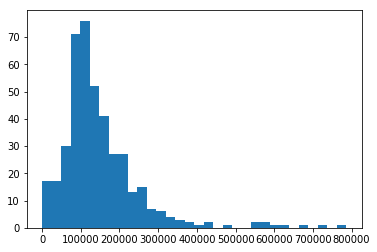

In [165]:
# histogram
# store_pf
plt.hist(store_pf, bins='auto')

In [15]:
# Total amount paid by store
store_amt = transactions.groupby('store_id').agg({'tran_prod_paid_amt': 'sum', 'tran_prod_discount_amt': 'sum', 'tran_prod_sale_amt':'sum', 'tran': 'nunique'}).sort_values(by = 'tran_prod_paid_amt', ascending = False).reset_index()

In [16]:
# Calculate percentage of discount
store_amt['tran_prod_discount_amt'] = -store_amt['tran_prod_discount_amt'] 
store_amt['dist_amt'] = store_amt['tran_prod_discount_amt']/store_amt['tran_prod_sale_amt']

pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Store and date

In [17]:
store_dt = transactions.groupby('store_id').agg({'tran_dt':['min', 'max']}).reset_index()
store_dt.columns = ['store_id', 'dt_min', 'dt_max']

In [19]:
# Calculate store duraction
store_dt['duration'] = store_dt['dt_max'] - store_dt['dt_min']

### Store and products

In [22]:
# Total number of products by store
store_prod = transactions.groupby('store_id').agg({'prod_id':'nunique'}).sort_values(by = 'prod_id', ascending = False).reset_index()
store_prod.columns = ['store_id', 'prod_num']

### Store and customers

In [24]:
# Total number of customers by store
store_cust = transactions.groupby('store_id').agg({'cust_id':'nunique'}).sort_values(by = 'cust_id', ascending = False).reset_index()
store_cust.columns = ['store_id', 'cust_num']

### [Store concatenate]

In [26]:
# Create a dataframe for all the store-related columns
store_amt = store_amt.set_index('store_id')
store_dt = store_dt.set_index('store_id')
store_prod = store_prod.set_index('store_id')
store_cust = store_cust.set_index('store_id')
store_info = pd.concat([store_amt, store_dt, store_prod, store_cust], axis = 1)

In [201]:
# Calculate the correlation among those variables
store_info.corr()

,tran_prod_paid_amt,tran_prod_discount_amt,tran_prod_sale_amt,dist_amt,group,prod_num,cust_num
tran_prod_paid_amt,1.0000,0.9780,0.9993,0.2229,-0.7680,0.7977,0.6753
tran_prod_discount_amt,0.9780,1.0000,0.9852,0.3374,-0.6994,0.7554,0.6732
tran_prod_sale_amt,0.9993,0.9852,1.0000,0.2444,-0.7580,0.7927,0.6771
dist_amt,0.2229,0.3374,0.2444,1.0000,-0.1401,0.2958,0.0881
group,-0.7680,-0.6994,-0.7580,-0.1401,1.0000,-0.8030,-0.4155
prod_num,0.7977,0.7554,0.7927,0.2958,-0.8030,1.0000,0.5208
cust_num,0.6753,0.6732,0.6771,0.0881,-0.4155,0.5208,1.0000


### Store and loyal customer

In [33]:
cust_freq = transactions.groupby('cust_id').agg({'tran_dt': 'nunique'}).sort_values(by = 'tran_dt', ascending = False).reset_index()

In [35]:
# every store calculate number of customers who visited 50/100/350/600 times

for i in store_info.index:
    t = transactions.loc[transactions.store_id == i, ]
    t = t.groupby('cust_id').tran_dt.nunique()
    store_info.loc[store_info.index == i, 'cust_50'] = len(t[t>=50])/len(t)
    store_info.loc[store_info.index == i, 'cust_100'] = len(t[t>=100])/len(t)
    store_info.loc[store_info.index == i, 'cust_350'] = len(t[t>=350])/len(t)
    store_info.loc[store_info.index == i, 'cust_600'] = len(t[t>=600])/len(t)

### Store and weekdays/weekends

In [38]:
from datetime import date

t = transactions.loc[transactions.weekend == 1, ].copy()
t = t.groupby(['store_id']).agg({'tran_prod_sale_amt':'sum', 'tran':'nunique'})
t.rename(columns={'tran_prod_sale_amt':'wknd_sales', 'tran':'wknd_trans'}, inplace = True)

In [40]:
store_info = pd.concat([store_info, t], axis = 1)

In [42]:
# Calcuate weekend sales and weekend transactions percentage
store_info['wknd_sales'] = store_info['wknd_sales']/store_info['tran_prod_sale_amt']
store_info['wknd_trans'] = store_info['wknd_trans']/store_info['tran']

### Original Grouping
#### store: 0: medium, 1: very loyal, 2: wide customer, 3: bad; 
#### cust: 0: cherry picker, 1: loyal, not price sensitive, 2: weekend driven, 3: large purchase


In [64]:
# Include customer lables
cust_label = pd.read_csv('cust_label.csv')
cust_label = cust_label[['labels', 'cust_id']]
cust_label.columns = ['cust_labels', 'cust_id']

In [72]:
# Combine customer and store data
store_cust = transactions[['store_id', 'cust_id', 'tran']].drop_duplicates()
store_cust = pd.merge(store_cust, cust_label, on = 'cust_id')
store_cust = store_cust.groupby(['store_id', 'cust_labels']).tran.nunique().reset_index()
store_tran = store_cust.groupby('store_id').tran.sum().reset_index()

store_cust = pd.merge(store_cust, store_tran, on = 'store_id')

In [87]:
# Unstack the data
store_cust_unstack = store_cust.set_index(['store_id', 'cust_labels'])
store_cust_unstack = store_cust_unstack.unstack()
store_cust_unstack.columns = ['cust_label_0', 'cust_label_1', 'cust_label_2', 'cust_label_3']
store_cust_unstack.fillna(0, inplace = True)

In [95]:
# Combine all the features into a big table
export = store_info[['cust_num', 'tran', 'cust_50', 'cust_100', 'cust_350', 'tran_prod_sale_amt', 'wknd_sales',\
                     'wknd_trans']].copy()
export = pd.concat([export, store_cust_unstack], axis = 1)
export.dropna(inplace = True)

In [100]:
# Export the data
export.to_csv('stores_test.csv')